## Experiment of feature-extraction

### 1. Mel-spectrogram 

original method

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa 
import librosa.display
import IPython.display as ipd
import noisereduce as nr

# Audio params
SAMPLE_RATE = 22050  # (samples/sec)
DURATION = 5.0  # duration in second (sec)
AUDIO_LEN = int(SAMPLE_RATE * DURATION)  # total number of samples in DURATION

# Spectrogram params
N_MELS = 128  # freq axis, number of filters
N_FFT = 2048  # frame size
HOP_LEN = 512  # non-overlap region, which means 1/4 portion overlapping
SPEC_WIDTH = AUDIO_LEN // HOP_LEN + 1  # time axis
FMAX = SAMPLE_RATE // 2  # max frequency, based on the rule, it should be half of SAMPLE_RATE
SPEC_SHAPE = [N_MELS, SPEC_WIDTH]  # expected output spectrogram shape

def load_audio(filepath, sr=SAMPLE_RATE):  # load the audio
    audio, sr = librosa.load(filepath, sr=sr)
    return audio, sr

def plot_audio(audio, sr=SAMPLE_RATE):  # Plot in time domain
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

def get_spectrum(audio, sr=SAMPLE_RATE):  # Plot in frequency domain
    sp = np.fft.fft(audio)
    ampSP = np.abs(sp)
    
    # Calculate the frequency axis
    freq_axis = np.fft.fftfreq(len(sp), 1 / sr)
    
    # the magnitude spectrum
    plt.figure(figsize=(10, 4))
    plt.plot(freq_axis[:len(freq_axis)//2], ampSP[:len(freq_axis)//2])  # Only plot the positive frequencies
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum')
    plt.grid(True)
    plt.show()

def listen_audio(audio, sr=SAMPLE_RATE):  # Listen to audio file
    ipd.display(ipd.Audio(audio, rate=sr))

def get_mel_spectrogram(audio, sr=SAMPLE_RATE):  # Get the mel-spectrogram
    spec = librosa.feature.melspectrogram(y=audio, sr=sr, fmax=sr//2, n_mels=N_MELS, hop_length=HOP_LEN, n_fft=N_FFT)
    spec = librosa.power_to_db(spec)  # Turn into log-scale
    return spec

def plot_mel_spectrogram(spec, sr=SAMPLE_RATE):  # Plot the mel-spectrogram
    fig = librosa.display.specshow(spec, x_axis='time', y_axis='mel', sr=sr, hop_length=HOP_LEN, cmap='viridis')
    return fig

def plot_all(audio): 
    print('# Listen')
    listen_audio(audio)

    print("# Plot\n")
    # plt.figure(figsize=(18, 5))

    # plt.subplot(121)
    plot_audio(audio)
    # plt.title("Waveform",fontsize=17)

    # plt.subplot(122)
    get_spectrum(audio)
    # plt.xlabel('Frequency (Hz)')
    # plt./ylabel('Magnitude')
    # plt.title('Magnitude Spectrum')
    # plt.g/rid(True)
    # plt.show()

    # plt.figure(figsize=(12, 5))
    spec = get_mel_spectrogram(audio) 
    
    plot_mel_spectrogram(spec)
    plt.title("Spectrogram",fontsize=17)
    plt.show()

# Data preprocessing
# Use threshold to delete the low-volume data
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate / 10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask, y_mean

# Min-Max normalize
def normalize_audio(audio):
    return (audio - np.min(audio)) / (np.max(audio) - np.min(audio))

def denoise(audio, sr=SAMPLE_RATE):
    reduced_noise = nr.reduce_noise(y=audio, sr=sr, stationary=True, prop_decrease=0.95, n_fft=N_FFT)
    return reduced_noise

c:\Users\User\anaconda3\envs\g_project_env1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(AUDIO_LEN)

110250


(128, 216) <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Spectrogram')

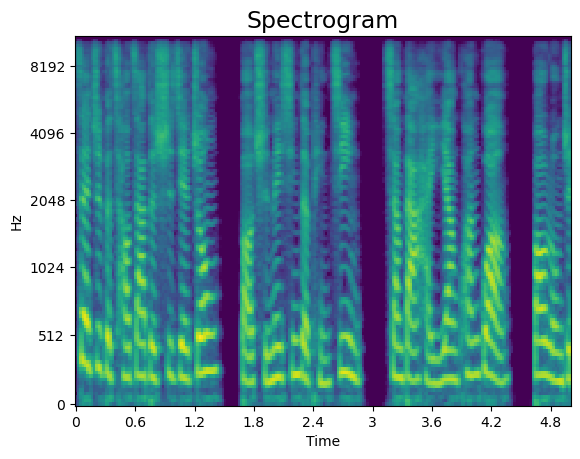

In [3]:
audio, sr = load_audio("t_feature_extraction_output_9.wav", SAMPLE_RATE)
audio = audio[:AUDIO_LEN]
spec = get_mel_spectrogram(audio)  
print(spec.shape, type(spec))
plot_mel_spectrogram(spec)
plt.title("Spectrogram",fontsize=17)

### 2. MFCC

In [4]:
mfcc = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=13, fmax=FMAX, n_mels=N_MELS, hop_length=HOP_LEN, n_fft=N_FFT)
print(mfcc.shape)

(13, 216)


### 3. Chroma

In [5]:
chroma = librosa.feature.chroma_stft(y=audio, sr=SAMPLE_RATE, n_chroma=12, n_fft=N_FFT, hop_length=HOP_LEN)
print(chroma.shape)


(12, 216)


Plot all

In [6]:
def plot_melspec_mfcc_chroma(mel_spec, mfcc, chroma):
    # Plot the features
    plt.figure(figsize=(15, 5))

    # Plot Mel-spectrogram
    plt.subplot(1, 3, 1)
    librosa.display.specshow(spec, x_axis='time', y_axis='mel', sr=sr, hop_length=HOP_LEN, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-spectrogram')

    # Plot MFCC
    plt.subplot(1, 3, 2)
    librosa.display.specshow(mfcc, x_axis='time', sr=sr, hop_length=HOP_LEN, cmap='viridis')
    plt.colorbar()
    plt.title('MFCC')

    # Plot Chroma
    plt.subplot(1, 3, 3)
    librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', sr=sr, hop_length=HOP_LEN, cmap='viridis')
    plt.colorbar()
    plt.title('Chroma')

    plt.tight_layout()
    plt.show()

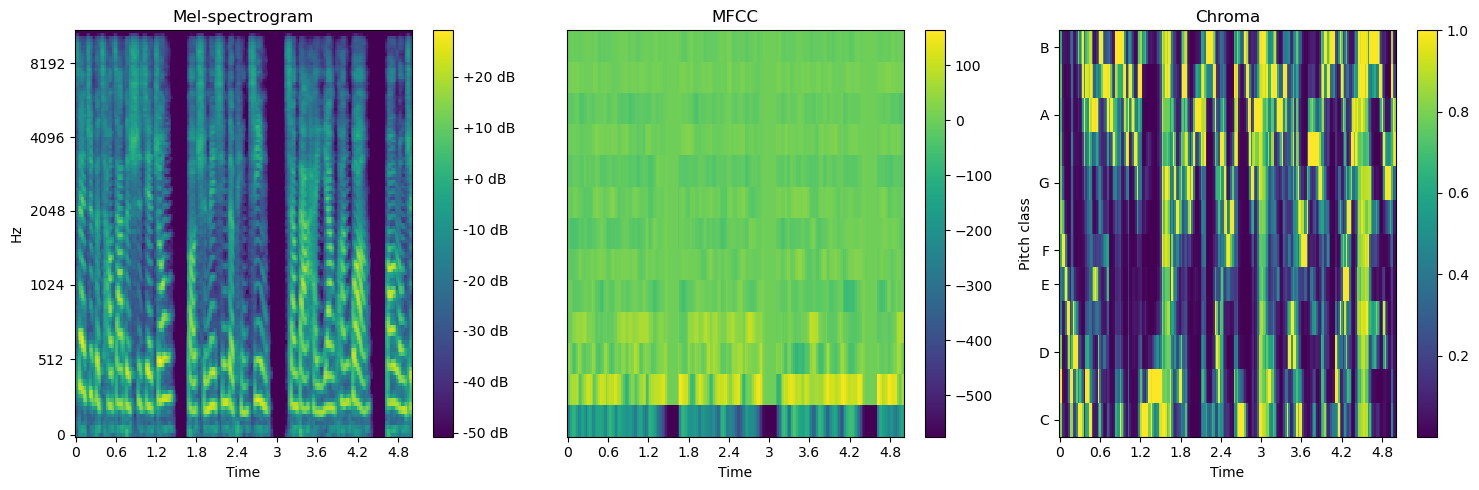

In [7]:
plot_melspec_mfcc_chroma(spec, mfcc, chroma)

查看一些語音的原始sample rate

In [8]:
audio, sr = librosa.load(r"D:\clone_audio\suno_bark\suno_bark_audio\fake\fake_zh_speaker_0_ID_0.wav", sr=None)
print(f'Sample Rate: {sr}')

Sample Rate: 24000


看一些ASVspoof2019的音檔

* 以sr=16000

(128, 79) <class 'numpy.ndarray'>


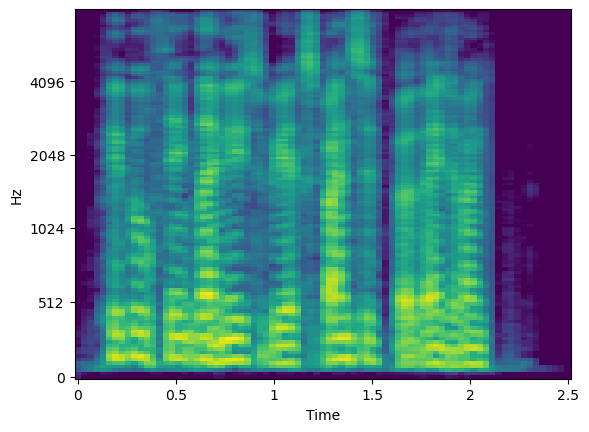

In [9]:
audio, sr = load_audio("LA_T_1000137.flac", sr=16000)
audio = audio[:AUDIO_LEN]
spec = get_mel_spectrogram(audio)  
print(spec.shape, type(spec))
listen_audio(audio, sr=16000)
spec = get_mel_spectrogram(audio, sr=16000)
plot_mel_spectrogram(spec, sr=16000)
plt.show()

* 以sr=22050

(128, 108) <class 'numpy.ndarray'>
# Listen


# Plot



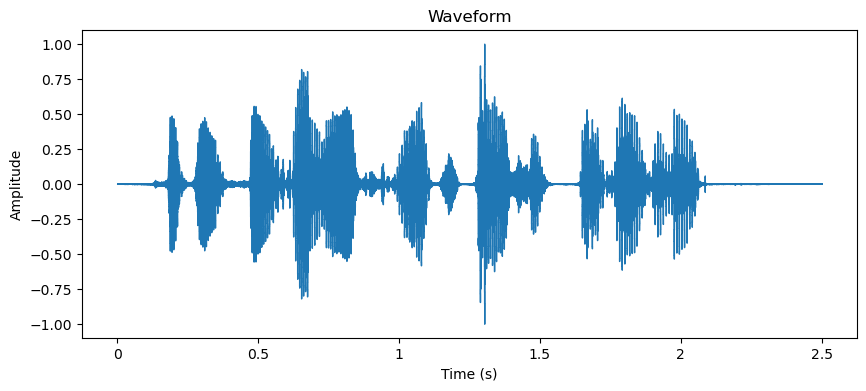

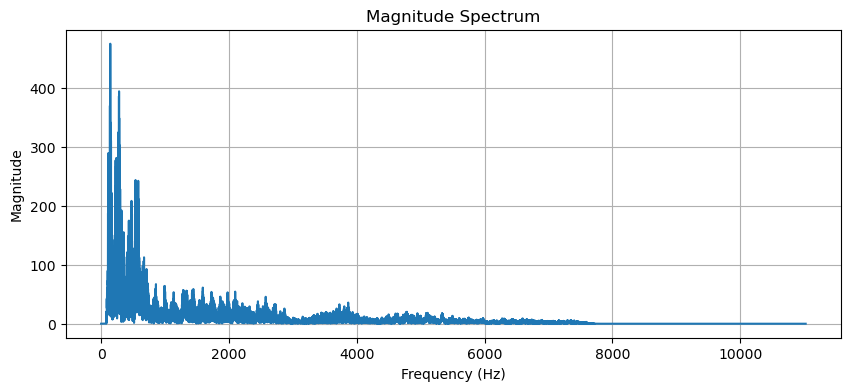

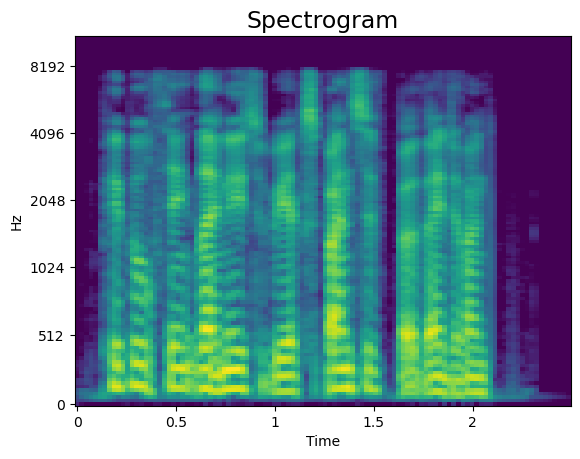

In [10]:
audio, sr = load_audio("LA_T_1000137.flac", SAMPLE_RATE)
audio = audio[:AUDIO_LEN]
spec = get_mel_spectrogram(audio)  
print(spec.shape, type(spec))
plot_all(audio)

將三種特徵合併成一張圖

1. use torch to interpolate

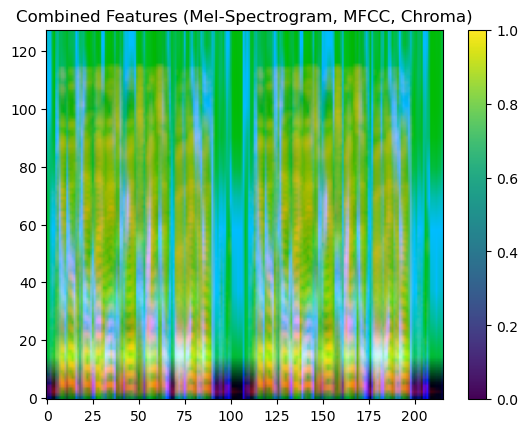

In [27]:
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
from observe_audio_function_ver3 import SAMPLE_RATE, AUDIO_LEN, load_audio, get_mel_spectrogram, get_mfcc, get_chroma

# Load and process audio
audio, sr = load_audio("LA_T_1000137.flac", SAMPLE_RATE)
if len(audio) < AUDIO_LEN:
    length_audio = len(audio)
    repeat_count = (AUDIO_LEN + length_audio - 1) // length_audio  # Calculate the `ceiling` of AUDIO_LEN / length_audio
    audio = np.tile(audio, repeat_count)[:AUDIO_LEN]  # Repeat and cut to the required length
else:
    audio = audio[:AUDIO_LEN]

# Extract features
spec = get_mel_spectrogram(audio)  
mfcc = get_mfcc(audio)
chroma = get_chroma(audio)

# Resize MFCC and chroma to match the mel spectrogram size
target_size = (128, 216)
mfcc_tensor = torch.tensor(mfcc).unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 13, 216)
chroma_tensor = torch.tensor(chroma).unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 12, 216)

mfcc_resized = F.interpolate(mfcc_tensor, size=target_size, mode='bilinear', align_corners=False).squeeze(0).squeeze(0)  # Shape: (128, 216)
chroma_resized = F.interpolate(chroma_tensor, size=target_size, mode='bilinear', align_corners=False).squeeze(0).squeeze(0)  # Shape: (128, 216)

# Convert mel spectrogram to tensor
spec_tensor = torch.tensor(spec)

# Normalize each feature to be in the range [0, 1] for visualization
spec_norm = (spec_tensor - spec_tensor.min()) / (spec_tensor.max() - spec_tensor.min())
mfcc_norm = (mfcc_resized - mfcc_resized.min()) / (mfcc_resized.max() - mfcc_resized.min())
chroma_norm = (chroma_resized - chroma_resized.min()) / (chroma_resized.max() - chroma_resized.min())


# Combine the features into a single image with 3 channels
combined_image = torch.stack([spec_norm, mfcc_norm, chroma_norm], dim=0).numpy()  # Shape: (3, 128, 216)

# Plot the combined features
plt.imshow(combined_image.transpose(1, 2, 0),aspect='auto', origin='lower')
plt.title('Combined Features (Mel-Spectrogram, MFCC, Chroma)')
# plt.savefig("three.png")
plt.colorbar()
plt.show()


2. Another way numpy 將數據進行循環，即從頭開始填充數據，直到達到所需的形狀。

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 216, 3)


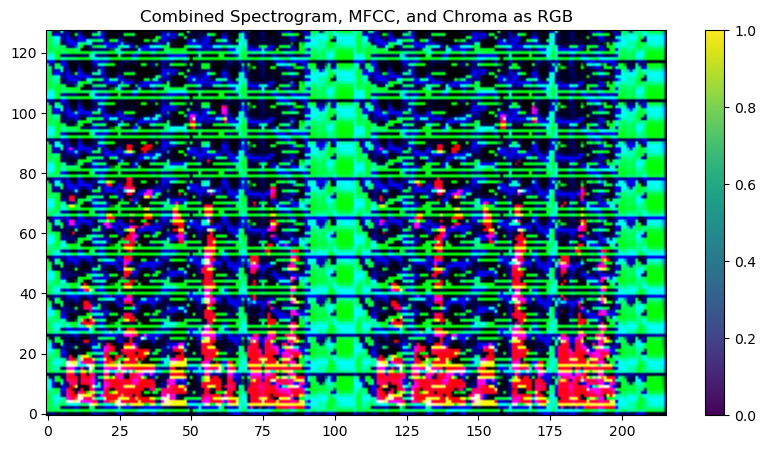

In [19]:
mfcc_pad = np.pad(mfcc, ((0, 128 - 13), (0, 0)), mode='wrap')
chroma_pad = np.pad(chroma, ((0, 128 - 12), (0, 0)), mode='wrap')

stacked_array = np.stack((spec, mfcc_pad, chroma_pad), axis=2)

print(stacked_array.shape)  # 輸出形狀 (128, 100, 3)

# Plot the stacked array
plt.figure(figsize=(10, 5))
plt.imshow(stacked_array, aspect='auto', origin='lower')
plt.colorbar()
plt.title('Combined Spectrogram, MFCC, and Chroma as RGB')
plt.show()

### 兩者做法比較
這個做法與前面使用 `torch` 進行處理的方式有幾個主要的差別：

### 1. 使用 `numpy` 進行處理

在這個新方法中，你使用了 `numpy` 進行數據的填充和處理，而不是 `torch`。這意味著你不需要進行數據類型轉換，直接在 `numpy` 數組上操作。

### 2. 填充方式的不同

你使用了 `numpy.pad` 來填充 MFCC 和 chroma 特徵，使它們與 mel-spectrogram 一樣具有 128 個頻帶。這裡使用了 `mode='wrap'` 進行填充，這種方式將數據進行循環填充，這與使用 `torch` 的 `F.interpolate` 進行雙線性插值有所不同。

- **`mode='wrap'`**: 這種填充模式會將數據進行循環，即從頭開始填充數據，直到達到所需的形狀。
- **雙線性插值 (`bilinear interpolation`)**: 這種方法會根據數據的鄰近值進行插值，使結果更加平滑。

### 3. 特徵堆疊的方式

這個方法中，你直接將三個特徵（mel-spectrogram、MFCC、chroma）堆疊在一起形成了一個 (128, 216, 3) 的三維數組，其中第三個維度代表不同的特徵通道（類似 RGB 通道）。這樣的數據可以直接用於可視化，如顯示圖像。

### 4. 可視化的結果

通過這種方式生成的圖像，實際上是將每個特徵視為一個顏色通道，這樣你可以在一張圖像中同時觀察到三個不同的特徵。這樣的圖像雖然直觀，但每個通道之間的數值範圍和分佈可能不一致，所以在視覺上可能不會像正常的 RGB 圖像那樣自然。

### 5. 特徵範圍和表示

在這個方法中，三個特徵沒有經過標準化處理（即範圍調整到 [0, 1]），這可能會影響圖像的顯示效果，因為不同特徵的範圍可能差異很大。因此，對於可視化而言，進行範圍標準化可以使每個特徵在圖像中有更均衡的展示。

### 總結

這種方法更直接地將特徵數據轉化為圖像，但是由於沒有進行插值和標準化處理，因此在圖像質量和可解釋性上可能不如前面的方法。在實際應用中，選擇哪種方法取決於你的具體需求：如果只是簡單的可視化，這種方法可能更方便；如果需要更高質量的圖像或數據的一致性處理，前面的 `torch` 方法可能更合適。


因此我就採用第一種作法